# Analysis Comparing Clusters

## Imports + Dataset Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import collections
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, silhouette_score, v_measure_score, silhouette_samples, jaccard_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
import math
import umap.plot
import umap.umap_ as umap_
from kneed import KneeLocator
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import json

### Data Setup

In [2]:
DATA_DIR_PATH = '/Users/cindywang/PycharmProjects/bpd-subtyping/data/'
CDATA_DIR_PATH = DATA_DIR_PATH + 'processed/clusters/'
VDATA_DIR_PATH = DATA_DIR_PATH + 'processed/vector/'
RDATA_DIR_PATH = DATA_DIR_PATH + 'processed/risk/'

In [3]:
# importing in important datasets
ds_df = pd.read_csv(DATA_DIR_PATH + 'daily_support.csv')  # daily support dataframe
dw_df = pd.read_csv(DATA_DIR_PATH + 'daily_weight.csv')
# dm_df = pd.read_csv(DATA_DIR_PATH + 'daily_medications.csv')  # daily medications dataframe
# dp_df = pd.read_csv(DATA_DIR_PATH + 'daily_procedures.csv')  # daily procedures dataframe
pf_df = pd.read_csv(DATA_DIR_PATH + 'patient_facts.csv')  # patient facts dataframe

In [4]:
mf_df = pd.read_csv(DATA_DIR_PATH + 'maternal_facts.csv')  # patient facts dataframe
dis_df = pd.read_csv(DATA_DIR_PATH + 'discharge_bpd_status.csv')  # bpd grade df
dis_df['BPD Grade'] = dis_df['BPD Grade'].replace(-1, 4)  # to adjust premature death to be 4 instead of -1
tar_df = pd.read_csv(DATA_DIR_PATH + 'processed/full/tar_df.csv')  # full risk df

In [9]:
pm_df = pd.read_csv(DATA_DIR_PATH + 'patient_manifest.csv')

In [10]:
pm_df.merge(dis_df)['BPD Grade'].value_counts()

0    37832
1    10670
2     6340
4     6095
3      968
Name: BPD Grade, dtype: int64

In [5]:
# for entry into sheet
columns = ['umap_KMeans_' + str(i) for i in range(2, 7)]
for cluster in clusters:
    print(cluster)
    curr_c_df = pd.read_csv(CDATA_DIR_PATH + cluster + c_suffix)
    for col in columns:
        print(col)
        print(curr_c_df[col].value_counts())

NameError: name 'clusters' is not defined

### Visualization Setup

In [6]:
pal = sns.color_palette('colorblind')
colors = pal.as_hex()
print(colors)
new_pal = ['#0173b2', '#de8f05', '#029e73', '#ece133']
colors

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


['#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc',
 '#ca9161',
 '#fbafe4',
 '#949494',
 '#ece133',
 '#56b4e9']

In [7]:
clusters = ['lr_d1g3_t', 'lr_d3g3_t', 'lr_d7g3_t', 'lr_d14g3_t', 'lr_d21g3_t', 'lr_d27g3_t']
cluster_cols = ['umap_KMeans_2', 'umap_KMeans_2', 'umap_KMeans_2', 'umap_KMeans_2', 'umap_KMeans_5', 'umap_KMeans_4']
labels = ['A', 'B', 'C', 'D', 'E', 'F']
days = [1, 3, 7, 14, 21, 27]
grades = [3]
categories = [f"Day {day} Grade {grade}" for day in days for grade in grades]
days_mapping = dict(zip(clusters, categories))
c_suffix = 'c_df.csv'
mr_suffix = 'mr_df.csv'

### Visualizations

#### General Distribution Plots

lr_d1g3_t


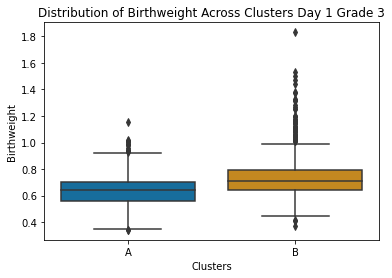

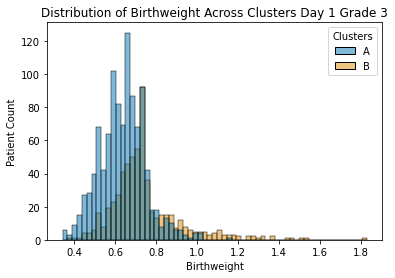

             Mean        SD
Cluster                    
A        0.636262  0.110973
B        0.744115  0.173358


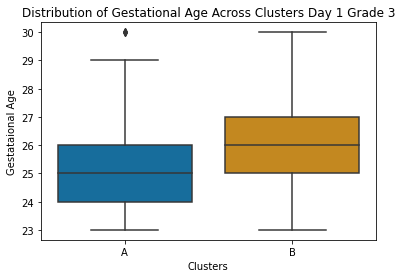

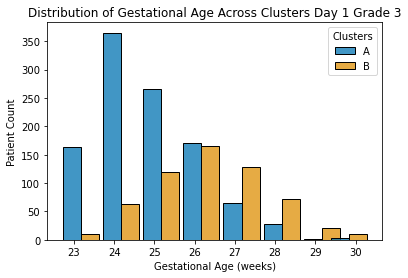

              Mean        SD
Cluster                     
A        24.725730  1.272788
B        26.170897  1.436651


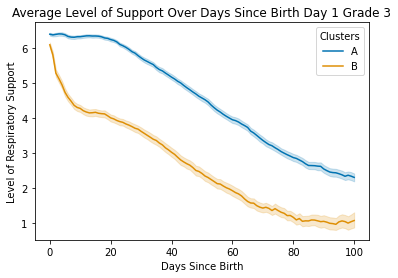

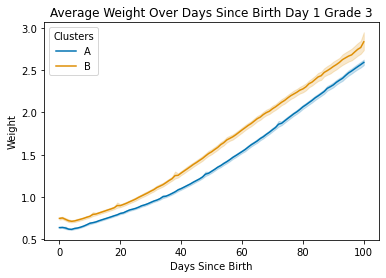

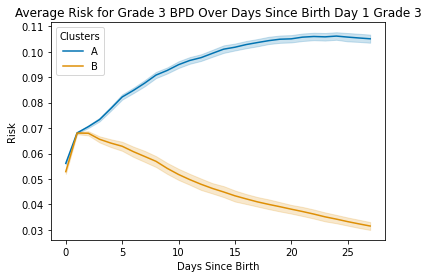

Average Risk Across Clusters
Cluster A: 0.0681014379420358
Cluster B: 0.06805478809373941


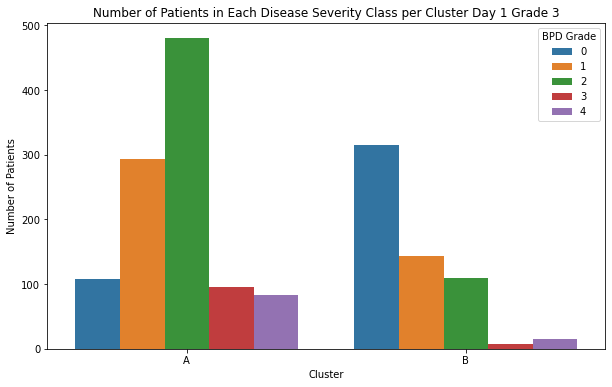

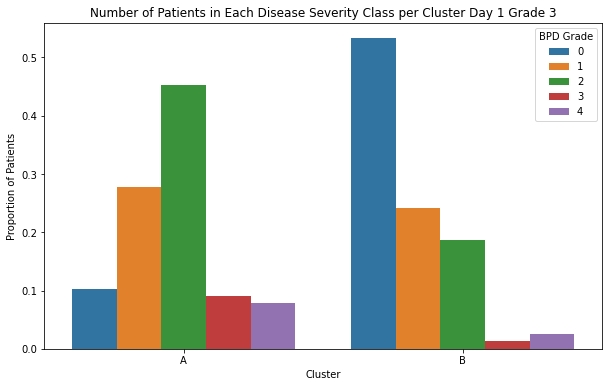

lr_d3g3_t


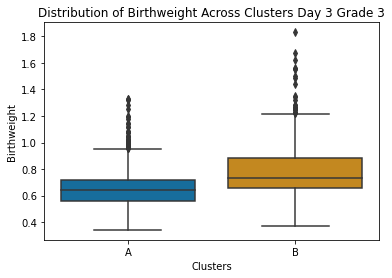

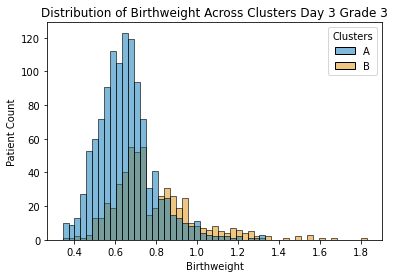

             Mean        SD
Cluster                    
A        0.651412  0.139877
B        0.788231  0.204786


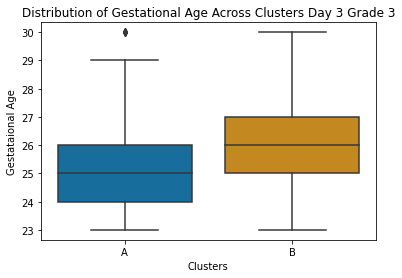

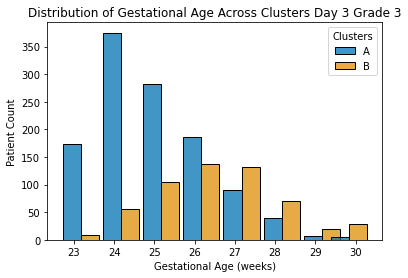

              Mean        SD
Cluster                     
A        24.838654  1.370434
B        26.376577  1.573870


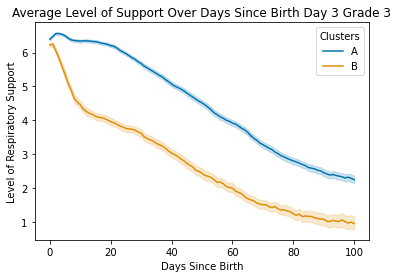

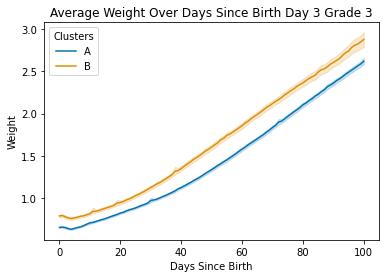

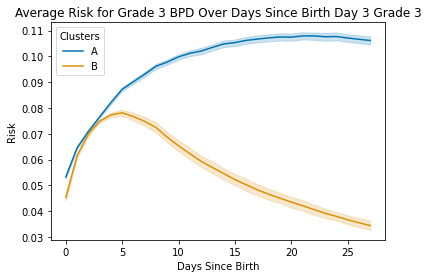

Average Risk Across Clusters
Cluster A: 0.07650969301708367
Cluster B: 0.07484402004630629


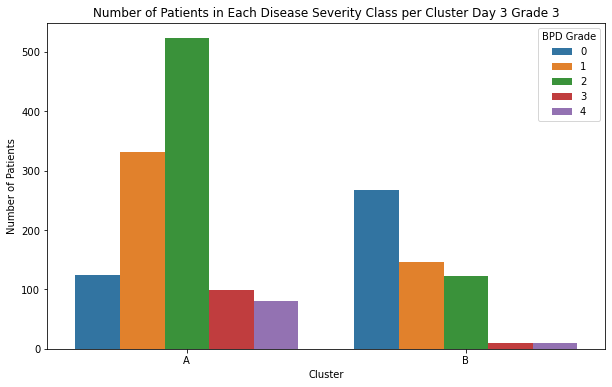

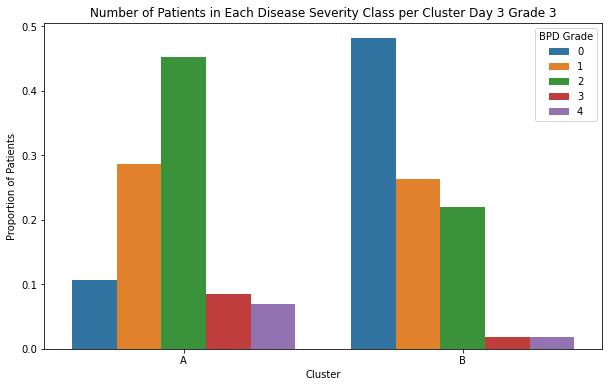

lr_d7g3_t


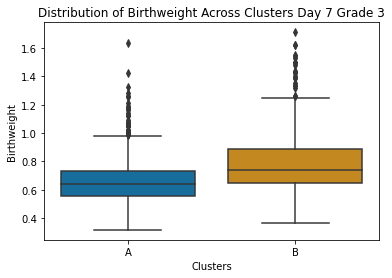

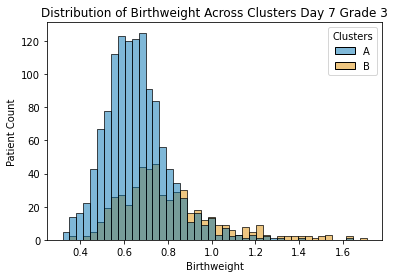

             Mean        SD
Cluster                    
A        0.655268  0.147171
B        0.795728  0.220294


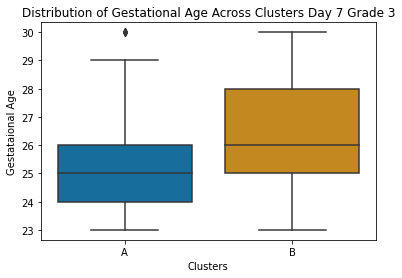

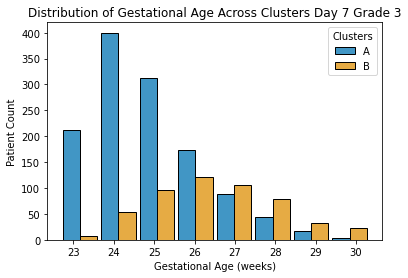

              Mean        SD
Cluster                     
A        24.798246  1.413637
B        26.437380  1.616586


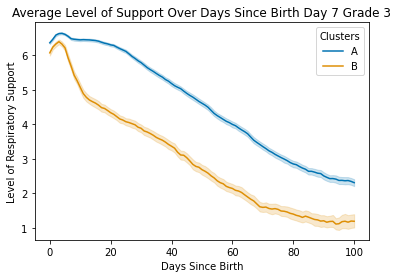

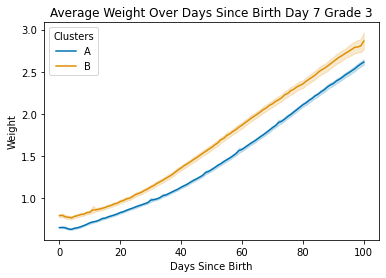

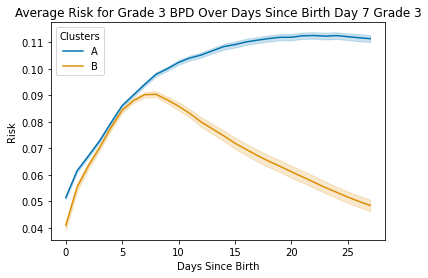

Average Risk Across Clusters
Cluster A: 0.09413091342145134
Cluster B: 0.09026177534739883


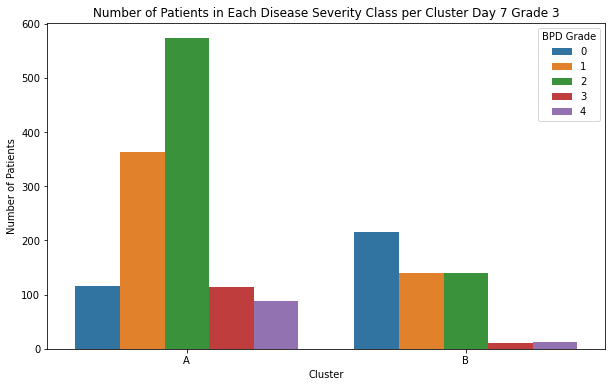

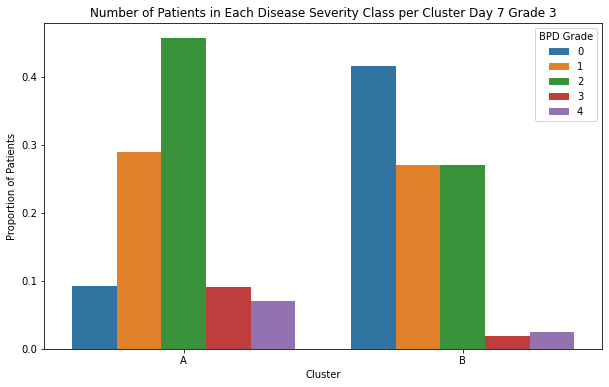

lr_d14g3_t


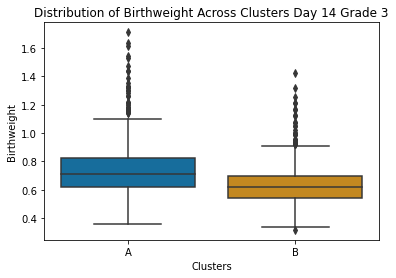

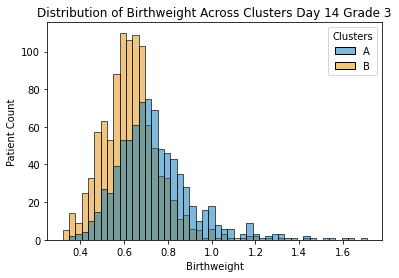

             Mean        SD
Cluster                    
A        0.740561  0.182782
B        0.630183  0.134280


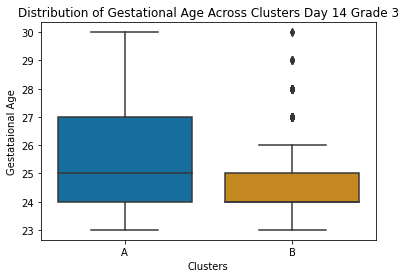

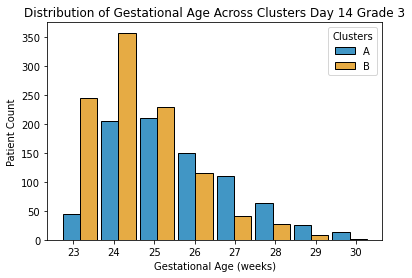

              Mean        SD
Cluster                     
A        25.532121  1.580908
B        24.490768  1.319254


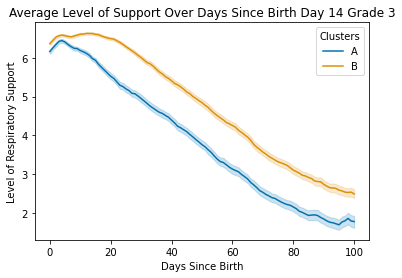

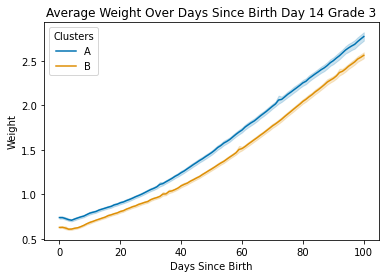

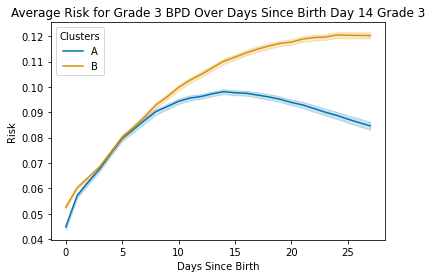

Average Risk Across Clusters
Cluster A: 0.09812439825575756
Cluster B: 0.1100843334259475


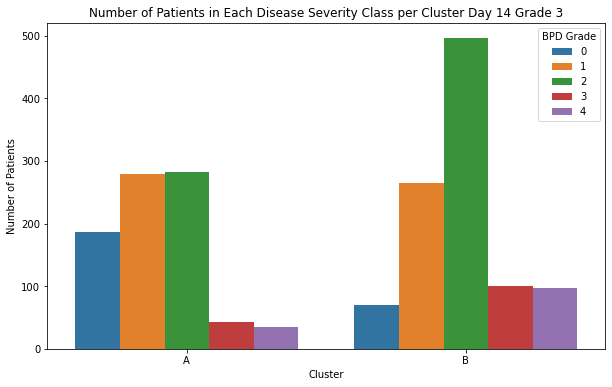

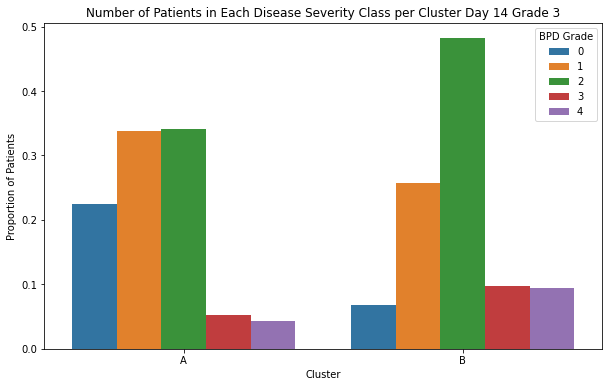

lr_d21g3_t


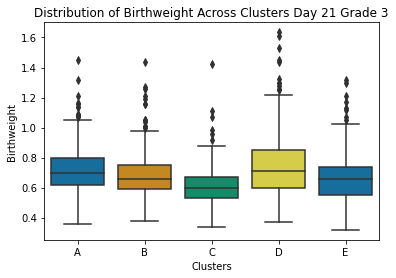

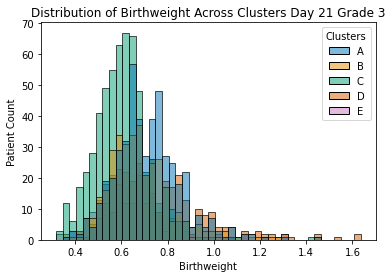

             Mean        SD
Cluster                    
A        0.713403  0.143625
B        0.680328  0.144397
C        0.604277  0.119383
D        0.750645  0.203984
E        0.665373  0.171130


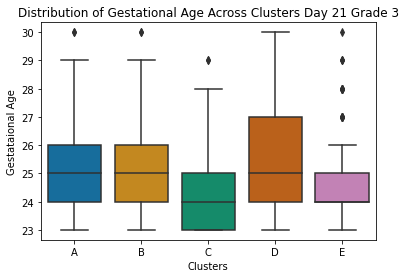

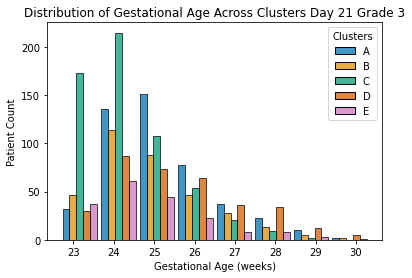

              Mean        SD
Cluster                     
A        25.151386  1.383860
B        24.895349  1.432884
C        24.261168  1.202624
D        25.480938  1.679571
E        24.702703  1.460808


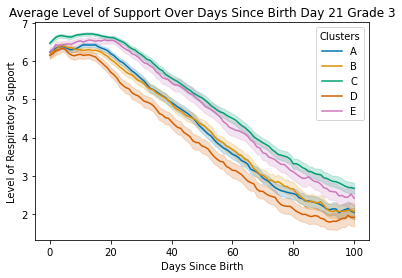

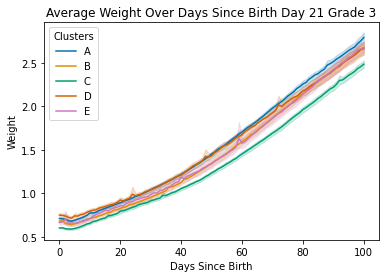

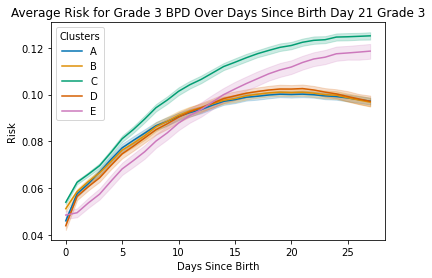

Average Risk Across Clusters
Cluster A: 0.10016266857249466
Cluster B: 0.10100259840203486
Cluster C: 0.12236711435910651
Cluster D: 0.10256489474750732
Cluster E: 0.11371395367513513


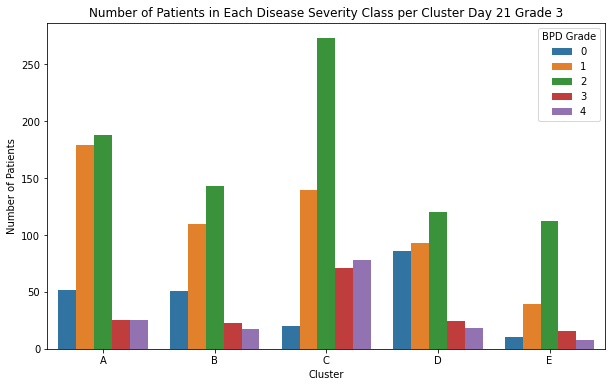

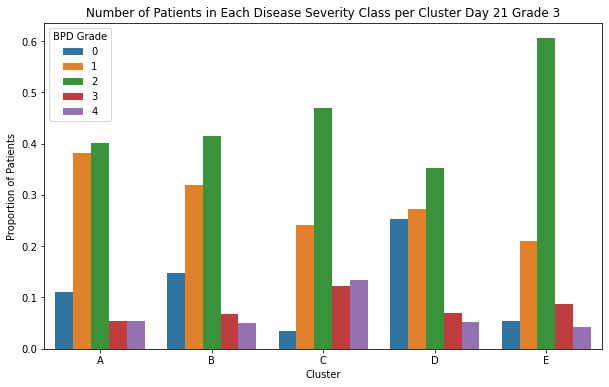

lr_d27g3_t


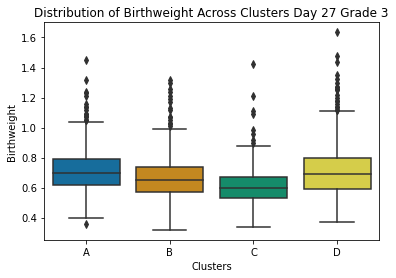

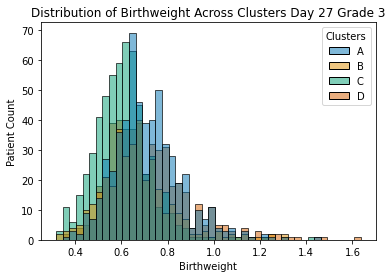

             Mean        SD
Cluster                    
A        0.711485  0.147568
B        0.665259  0.158705
C        0.604318  0.121479
D        0.721180  0.180454


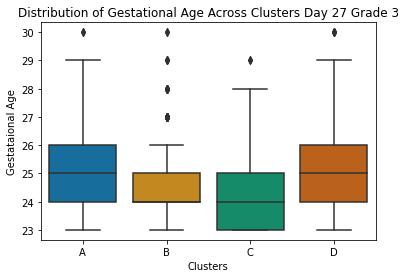

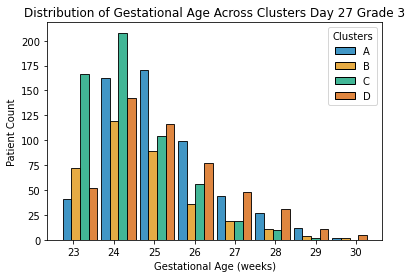

              Mean        SD
Cluster                     
A        25.144902  1.388162
B        24.630682  1.395953
C        24.275618  1.214225
D        25.184647  1.567979


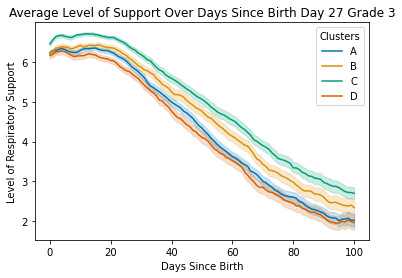

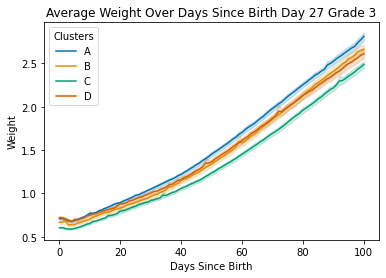

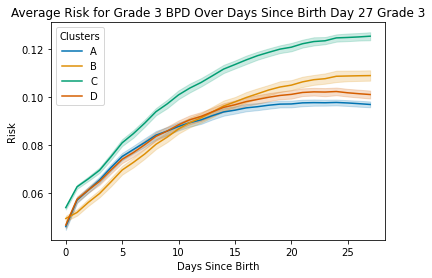

Average Risk Across Clusters
Cluster A: 0.09686523420876564
Cluster B: 0.10888688782840907
Cluster C: 0.12528050819805653
Cluster D: 0.10100914249066388


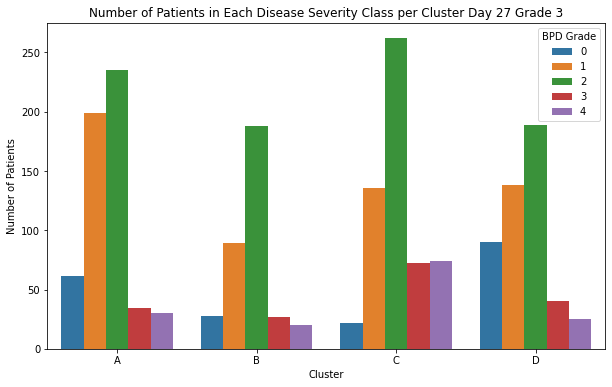

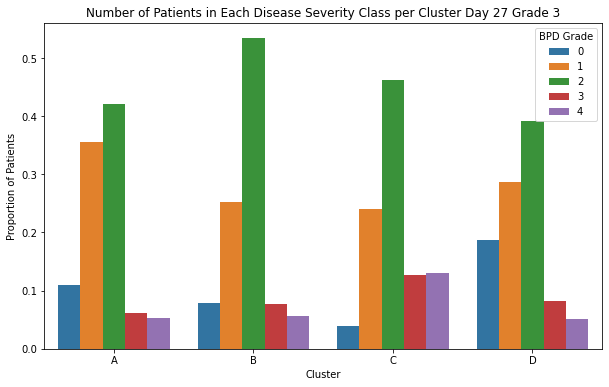

In [8]:
for cluster, cluster_col in zip(clusters, cluster_cols):
    curr_c_df = pd.read_csv(CDATA_DIR_PATH + cluster + c_suffix)
    num_clusters = len(list(set(curr_c_df[cluster_col])))
    curr_df = curr_c_df.merge(pf_df).merge(dis_df)
    curr_ds_df = curr_c_df.merge(ds_df)
    curr_dw_df = curr_c_df.merge(dw_df)
    curr_dr_df = curr_c_df.merge(tar_df)
    curr_mr_df = pd.read_csv(RDATA_DIR_PATH + cluster.strip('t') + mr_suffix)
    curr_labels = labels[0:num_clusters]
    identifier = days_mapping[cluster]
    print(cluster)
    
    # Birthweight
    g = sns.boxplot(data=curr_df, x=cluster_col, y='BirthWeight', palette=new_pal)
    g.set_xticks(range(len(curr_labels)))
    g.set_xticklabels(curr_labels)
    plt.title('Distribution of Birthweight Across Clusters ' + identifier)
    plt.xlabel('Clusters')
    plt.ylabel('Birthweight')

    fig, ax1 = plt.subplots()
    sp1 = sns.histplot(data=curr_df, x='BirthWeight', hue=cluster_col, palette='colorblind', ax=ax1, 
                       multiple='layer',
                      )
    ax1.set_title('Distribution of Birthweight Across Clusters ' + identifier)
    ax1.set_ylabel('Patient Count')
    ax1.set_xlabel('Birthweight')
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(handles, curr_labels, title='Clusters')
    plt.show()

    bw_means = curr_df.loc[:, [cluster_col, 'BirthWeight']].groupby(cluster_col).mean().reset_index()
    bw_means = list(bw_means['BirthWeight'])
    bw_sds = curr_df.loc[:, [cluster_col, 'BirthWeight']].groupby(cluster_col).std().reset_index()
    bw_sds = list(bw_sds['BirthWeight'])
    bw = pd.DataFrame({'Cluster': curr_labels, 'Mean': bw_means, 'SD': bw_sds}).set_index('Cluster')
    print(bw)
    # Gestational Age
    g = sns.boxplot(data=curr_df, x=cluster_col, y='GestAge', palette='colorblind')
    g.set_xticks(range(len(curr_labels)))
    g.set_xticklabels(curr_labels)
    plt.title('Distribution of Gestational Age Across Clusters ' + identifier)
    plt.xlabel('Clusters')
    plt.ylabel('Gestataional Age')

    fig, ax1 = plt.subplots()
    sp1 = sns.histplot(data=curr_df, x='GestAge', hue=cluster_col, palette='colorblind', ax=ax1, multiple='dodge',
                      shrink=2.7)
    ax1.set_title('Distribution of Gestational Age Across Clusters ' + identifier)
    ax1.set_ylabel('Patient Count')
    ax1.set_xlabel('Gestational Age (weeks)')
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(handles, curr_labels, title='Clusters')
    plt.show()

    ga_means = curr_df.loc[:, [cluster_col, 'GestAge']].groupby(cluster_col).mean().reset_index()
    ga_means = list(ga_means['GestAge'])
    ga_sds = curr_df.loc[:, [cluster_col, 'GestAge']].groupby(cluster_col).std().reset_index()
    ga_sds = list(ga_sds['GestAge'])
    ga = pd.DataFrame({'Cluster': curr_labels, 'Mean': ga_means, 'SD': ga_sds}).set_index('Cluster')
    print(ga)

    # Support Type Trajectory
    fig, ax1 = plt.subplots()
    sp1 = sns.lineplot(data=curr_ds_df.loc[curr_ds_df['DSB'] <= 100], x='DSB', y='SupportType', 
                       hue=cluster_col, palette = 'colorblind', ax=ax1)
    ax1.set_title('Average Level of Support Over Days Since Birth ' + identifier)
    ax1.set_ylabel('Level of Respiratory Support')
    ax1.set_xlabel('Days Since Birth')
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(handles, curr_labels, title='Clusters')
    plt.show()
  

    # Daily Weight Trajectory
    fig, ax1 = plt.subplots()
    sp1 = sns.lineplot(data=curr_dw_df.loc[curr_dw_df['Daily_DSB'] <= 100], x='Daily_DSB', y='Weight', 
                       hue=cluster_col, palette = 'colorblind', ax=ax1)
    ax1.set_title('Average Weight Over Days Since Birth ' + identifier)
    ax1.set_ylabel('Weight')
    ax1.set_xlabel('Days Since Birth')
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(handles, curr_labels, title='Clusters')
    plt.show()
    
    
    # Severe BPD Risk Trajectory
    fig, ax1 = plt.subplots()
    sp1 = sns.lineplot(data=curr_dr_df.loc[curr_dr_df['DSB'] <= 100], x='DSB', y='grade_3_prob', 
                       hue=cluster_col, palette = 'colorblind', ax=ax1)
    ax1.set_title('Average Risk for Grade 3 BPD Over Days Since Birth ' + identifier)
    ax1.set_ylabel('Risk')
    ax1.set_xlabel('Days Since Birth')
    legend = ax1.get_legend()
    handles = legend.legendHandles
    legend.remove()
    ax1.legend(handles, curr_labels, title='Clusters')
    plt.show()

    # Risk Comparisons
    merged = curr_c_df.merge(curr_mr_df.loc[:, ['PatientSeqID', 'grade_3_prob']])
    avg_risks = list(merged.groupby(cluster_col).mean()['grade_3_prob'])
    print("Average Risk Across Clusters")
    for risk, lab in zip(avg_risks, curr_labels):
        print(f"Cluster {lab}: {risk}")
    
    
    # Purity Analysis
    grouped = curr_df.groupby([cluster_col, 'BPD Grade']).size().reset_index(name='counts')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cluster_col, y='counts', hue='BPD Grade', data=grouped)
    ax.set_xticklabels(curr_labels)
    plt.title('Number of Patients in Each Disease Severity Class per Cluster ' + identifier)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Patients')
    plt.show()
    
    
    # Calculate total counts for each 'umap_KMeans'
    totals = curr_df.groupby(cluster_col).size().reset_index(name='total_counts')

    # Calculate counts for each combination of 'umap_KMeans' and 'BPD Grade'
    grouped = curr_df.groupby([cluster_col, 'BPD Grade']).size().reset_index(name='counts')

    # Merge the total counts into grouped DataFrame
    grouped = pd.merge(grouped, totals, on=cluster_col)

    # Calculate normalized counts
    grouped['normalized_counts'] = grouped['counts'] / grouped['total_counts']

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cluster_col, y='normalized_counts', hue='BPD Grade', data=grouped)
    ax.set_xticklabels(curr_labels)
    plt.title('Number of Patients in Each Disease Severity Class per Cluster ' + identifier)
    plt.xlabel('Cluster')
    plt.ylabel('Proportion of Patients')  # Update y label
    plt.show()
    

#### Sankey Plots

In [11]:
# Load data
lr_d1g3_df = pd.read_csv(CDATA_DIR_PATH + 'lr_d1g3_tc_df.csv')
lr_d3g3_df = pd.read_csv(CDATA_DIR_PATH + 'lr_d3g3_tc_df.csv')
lr_d7g3_df = pd.read_csv(CDATA_DIR_PATH + 'lr_d7g3_tc_df.csv')
lr_d14g3_df = pd.read_csv(CDATA_DIR_PATH + 'lr_d14g3_tc_df.csv')

In [32]:
not_d1 = set(list(pm_df['PatientSeqID'])) - set(list(lr_d1g3_df['PatientSeqID']))
not_d1_df = pd.DataFrame({"PatientSeqID": list(not_d1), 'umap_KMeans_2': [2 for _ in range(len(not_d1))]})
upd_lr_d1g3_df = pd.concat([lr_d1g3_df, not_d1_df])

In [68]:
nd1 = set(list(lr_d3g3_df['PatientSeqID']) + list(lr_d7g3_df['PatientSeqID']) + list(lr_d14g3_df['PatientSeqID']))
not_in_d1 = nd1 - set(list(lr_d1g3_df))
len(not_in_d1)
not_in_d1_df = pd.DataFrame({"PatientSeqID": list(not_in_d1), 
                             'umap_KMeans_2': [2 for _ in range(len(not_in_d1))]})


new_upd_lr_d1g3_df = pd.concat([lr_d1g3_df, not_in_d1_df])
# We will track the progression of patients using the 'umap_KMeans_2' column as the cluster identity
# Day 1 to Day 3
merged_d1_d3 = pd.merge(new_upd_lr_d1g3_df[['PatientSeqID', 'umap_KMeans_2']], 
                        lr_d3g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d1_d3.columns = ['PatientSeqID', 'Day1_Cluster', 'Day3_Cluster']

# Renaming the clusters for clarity
merged_d1_d3['Day1_Cluster'] = merged_d1_d3['Day1_Cluster'].map({0:'Bad in Day1', 1:'Good in Day1', 
                                                                 2: 'Not in Day1 DF'})
merged_d1_d3['Day3_Cluster'] = merged_d1_d3['Day3_Cluster'].map({0:'Bad in Day3', 1:'Good in Day3'})

# If the patient is not in the Day 3 dataframe, we assign them to a separate category
merged_d1_d3['Day3_Cluster'].fillna('Not in Day3 DF', inplace=True)

# Day 1 to Day 7
merged_d1_d7 = pd.merge(merged_d1_d3, lr_d7g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d1_d7.columns = ['PatientSeqID', 'Day1_Cluster', 'Day3_Cluster', 'Day7_Cluster']

# Renaming the clusters for clarity
merged_d1_d7['Day7_Cluster'] = merged_d1_d7['Day7_Cluster'].map({0:'Bad in Day7', 1:'Good in Day7'})

# If the patient is not in the Day 7 dataframe, we assign them to a separate category
merged_d1_d7['Day7_Cluster'].fillna('Not in Day7 DF', inplace=True)

# Day 1 to Day 14
merged_d1_d14 = pd.merge(merged_d1_d7, lr_d14g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d1_d14.columns = ['PatientSeqID', 'Day1_Cluster', 'Day3_Cluster', 'Day7_Cluster', 'Day14_Cluster']

# Renaming the clusters for clarity
merged_d1_d14['Day14_Cluster'] = merged_d1_d14['Day14_Cluster'].map({1:'Bad in Day14', 0:'Good in Day14'})

# If the patient is not in the Day 14 dataframe, we assign them to a separate category
merged_d1_d14['Day14_Cluster'].fillna('Not in Day14 DF', inplace=True)

# Define the discharge status labels
discharge_status_labels = {
    4: 'Premature Death',
    0: 'No BPD',
    1: 'Grade 1 BPD',
    2: 'Grade 2 BPD',
    3: 'Grade 3 BPD'
}

# Merge the Day 14 dataframe with the discharge status dataframe
merged_d1_d14_dis = pd.merge(merged_d1_d14, dis_df[['PatientSeqID', 'BPD Grade']], on='PatientSeqID', 
                                   how='left')

# Rename the 'BPD Grade' column to 'Discharge_Status'
merged_d1_d14_dis.rename(columns={'BPD Grade': 'Discharge_Status'}, inplace=True)

# Replace the discharge status codes with the corresponding labels
merged_d1_d14_dis['Discharge_Status'] = merged_d1_d14_dis['Discharge_Status'].map(discharge_status_labels)


# Creating Sankey Dataframe

# Day 1 to Day 3
source_d1_d3 = merged_d1_d7['Day1_Cluster']
target_d1_d3 = merged_d1_d7['Day3_Cluster']
df_d1_d3 = pd.DataFrame({'source': source_d1_d3, 'target': target_d1_d3, 'value': 1})

# Day 3 to Day 7
source_d3_d7 = merged_d1_d7['Day3_Cluster']
target_d3_d7 = merged_d1_d7['Day7_Cluster']
df_d3_d7 = pd.DataFrame({'source': source_d3_d7, 'target': target_d3_d7, 'value': 1})

# Append the two dataframes
sankey_df = pd.concat([df_d1_d3, df_d3_d7])

# Sum the flows from each source to each target
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

# Day 7 to Day 14
source_d7_d14 = merged_d1_d14['Day7_Cluster']
target_d7_d14 = merged_d1_d14['Day14_Cluster']
df_d1_d14 = pd.DataFrame({'source': source_d7_d14, 'target': target_d7_d14, 'value': 1})

# Append to previous two dataframes
sankey_df = pd.concat([sankey_df, df_d1_d14])

# Day 14 to Discharge
source_d14_discharge = merged_d1_d14_dis['Day14_Cluster']
target_d14_discharge = merged_d1_d14_dis['Discharge_Status']
df_d14_discharge = pd.DataFrame({'source': source_d14_discharge, 'target': target_d14_discharge, 'value': 1})

# Append the new dataframe to the existing Sankey dataframe
sankey_df = pd.concat([sankey_df, df_d14_discharge])

# Sum the flows from each source to each target
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

sankey_df.head()

import plotly.graph_objects as go

#Sort by Source and then Destination
ordered = ['Bad in Day1', 'Good in Day1', 'Not in Day1 DF', 'Bad in Day3', 'Good in Day3', 'Not in Day3 DF',
          'Bad in Day7', 'Good in Day7', 'Not in Day7 DF', 'Bad in Day14', 'Good in Day14', 'Not in Day14 DF',
          'Premature Death', 'Grade 3 BPD', 'Grade 2 BPD', 'Grade 1 BPD', 'No BPD']
sankey_df['source'] = pd.Categorical(sankey_df['source'], ordered)
sankey_df['target'] = pd.Categorical(sankey_df['target'], ordered)
sankey_df.sort_values(['source', 'target'], inplace = True)
sankey_df.reset_index(drop=True)

# Define nodes for the Sankey diagram
label_list = ordered

# Define sources, targets, and values for the Sankey diagram
source_indices = [label_list.index(source) for source in sankey_df['source']]
target_indices = [label_list.index(target) for target in sankey_df['target']]
values = sankey_df['value']

# Define colors for each category
color_dict = {
    'Bad in Day1': 'lightcoral',
    'Good in Day1': 'yellow',
    'Not in Day1 DF': 'lightgreen',
    'Bad in Day3': 'lightcoral',
    'Good in Day3': 'yellow',
    'Bad in Day7': 'lightcoral',
    'Good in Day7': 'yellow',
    'Bad in Day14': 'lightcoral',
    'Good in Day14': 'yellow',
    'Not in Day3 DF': 'lightgreen',
    'Not in Day7 DF': 'lightgreen',
    'Not in Day14 DF': 'lightgreen',
    'Premature Death': 'maroon',
    'No BPD': 'limegreen',
    'Grade 1 BPD': 'yellow',
    'Grade 2 BPD': 'lightcoral',
    'Grade 3 BPD': 'red'
}

# Map the colors to the labels
color_list = [color_dict[label] for label in label_list]

# Map the colors to the links (using the color of the source node for each link)
link_colors = [color_dict[source] for source in sankey_df['source']]

# Create the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=color_list
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Add colors to links
    )
)])

fig.update_layout(title_text="Patient Progression", font_size=10)
fig.show()


In [48]:
# We will track the progression of patients using the 'umap_KMeans_2' column as the cluster identity
# Day 1 to Day 3
merged_d1_d3 = pd.merge(upd_lr_d1g3_df[['PatientSeqID', 'umap_KMeans_2']], 
                        lr_d3g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d1_d3.columns = ['PatientSeqID', 'Day1_Cluster', 'Day3_Cluster']

# Renaming the clusters for clarity
merged_d1_d3['Day1_Cluster'] = merged_d1_d3['Day1_Cluster'].map({0:'Bad in Day1', 1:'Good in Day1', 
                                                                 2: 'Not in Day1 DF'})
merged_d1_d3['Day3_Cluster'] = merged_d1_d3['Day3_Cluster'].map({0:'Bad in Day3', 1:'Good in Day3'})

# If the patient is not in the Day 3 dataframe, we assign them to a separate category
merged_d1_d3['Day3_Cluster'].fillna('Not in Day3 DF', inplace=True)

merged_d1_d3

PatientSeqID    Day1_Cluster    Day3_Cluster
0           5231421    Good in Day1    Good in Day3
1           5232015     Bad in Day1     Bad in Day3
2           5232702     Bad in Day1     Bad in Day3
3           5233761     Bad in Day1  Not in Day3 DF
4           5234595    Good in Day1    Good in Day3
...             ...             ...             ...
61900       6029303  Not in Day1 DF  Not in Day3 DF
61901       5636090  Not in Day1 DF  Not in Day3 DF
61902       5898235  Not in Day1 DF  Not in Day3 DF
61903       6160380  Not in Day1 DF  Not in Day3 DF
61904       5242878  Not in Day1 DF  Not in Day3 DF

[61905 rows x 3 columns]

In [49]:
# Day 1 to Day 7
merged_d1_d7 = pd.merge(merged_d1_d3, lr_d7g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d1_d7.columns = ['PatientSeqID', 'Day1_Cluster', 'Day3_Cluster', 'Day7_Cluster']

# Renaming the clusters for clarity
merged_d1_d7['Day7_Cluster'] = merged_d1_d7['Day7_Cluster'].map({0:'Bad in Day7', 1:'Good in Day7'})

# If the patient is not in the Day 7 dataframe, we assign them to a separate category
merged_d1_d7['Day7_Cluster'].fillna('Not in Day7 DF', inplace=True)

merged_d1_d7.head()

PatientSeqID  Day1_Cluster    Day3_Cluster    Day7_Cluster
0       5231421  Good in Day1    Good in Day3  Not in Day7 DF
1       5232015   Bad in Day1     Bad in Day3     Bad in Day7
2       5232702   Bad in Day1     Bad in Day3     Bad in Day7
3       5233761   Bad in Day1  Not in Day3 DF  Not in Day7 DF
4       5234595  Good in Day1    Good in Day3  Not in Day7 DF

In [50]:
# Day 1 to Day 14
merged_d1_d14 = pd.merge(merged_d1_d7, lr_d14g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d1_d14.columns = ['PatientSeqID', 'Day1_Cluster', 'Day3_Cluster', 'Day7_Cluster', 'Day14_Cluster']

# Renaming the clusters for clarity
merged_d1_d14['Day14_Cluster'] = merged_d1_d14['Day14_Cluster'].map({1:'Bad in Day14', 0:'Good in Day14'})

# If the patient is not in the Day 14 dataframe, we assign them to a separate category
merged_d1_d14['Day14_Cluster'].fillna('Not in Day14 DF', inplace=True)

merged_d1_d14.head()

PatientSeqID  Day1_Cluster    Day3_Cluster    Day7_Cluster    Day14_Cluster
0       5231421  Good in Day1    Good in Day3  Not in Day7 DF  Not in Day14 DF
1       5232015   Bad in Day1     Bad in Day3     Bad in Day7     Bad in Day14
2       5232702   Bad in Day1     Bad in Day3     Bad in Day7    Good in Day14
3       5233761   Bad in Day1  Not in Day3 DF  Not in Day7 DF  Not in Day14 DF
4       5234595  Good in Day1    Good in Day3  Not in Day7 DF  Not in Day14 DF

In [51]:
# Define the discharge status labels
discharge_status_labels = {
    4: 'Premature Death',
    0: 'No BPD',
    1: 'Grade 1 BPD',
    2: 'Grade 2 BPD',
    3: 'Grade 3 BPD'
}

# Merge the Day 14 dataframe with the discharge status dataframe
merged_d1_d14_dis = pd.merge(merged_d1_d14, dis_df[['PatientSeqID', 'BPD Grade']], on='PatientSeqID', 
                                   how='left')

# Rename the 'BPD Grade' column to 'Discharge_Status'
merged_d1_d14_dis.rename(columns={'BPD Grade': 'Discharge_Status'}, inplace=True)

# Replace the discharge status codes with the corresponding labels
merged_d1_d14_dis['Discharge_Status'] = merged_d1_d14_dis['Discharge_Status'].map(discharge_status_labels)

merged_d1_d14_dis.head()


PatientSeqID  Day1_Cluster    Day3_Cluster    Day7_Cluster  \
0       5231421  Good in Day1    Good in Day3  Not in Day7 DF   
1       5232015   Bad in Day1     Bad in Day3     Bad in Day7   
2       5232702   Bad in Day1     Bad in Day3     Bad in Day7   
3       5233761   Bad in Day1  Not in Day3 DF  Not in Day7 DF   
4       5234595  Good in Day1    Good in Day3  Not in Day7 DF   

     Day14_Cluster Discharge_Status  
0  Not in Day14 DF      Grade 3 BPD  
1     Bad in Day14  Premature Death  
2    Good in Day14      Grade 2 BPD  
3  Not in Day14 DF      Grade 2 BPD  
4  Not in Day14 DF      Grade 1 BPD

In [52]:
# Creating Sankey Dataframe

# Day 1 to Day 3
source_d1_d3 = merged_d1_d7['Day1_Cluster']
target_d1_d3 = merged_d1_d7['Day3_Cluster']
df_d1_d3 = pd.DataFrame({'source': source_d1_d3, 'target': target_d1_d3, 'value': 1})

# Day 3 to Day 7
source_d3_d7 = merged_d1_d7['Day3_Cluster']
target_d3_d7 = merged_d1_d7['Day7_Cluster']
df_d3_d7 = pd.DataFrame({'source': source_d3_d7, 'target': target_d3_d7, 'value': 1})

# Append the two dataframes
sankey_df = pd.concat([df_d1_d3, df_d3_d7])

# Sum the flows from each source to each target
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

# Day 7 to Day 14
source_d7_d14 = merged_d1_d14['Day7_Cluster']
target_d7_d14 = merged_d1_d14['Day14_Cluster']
df_d1_d14 = pd.DataFrame({'source': source_d7_d14, 'target': target_d7_d14, 'value': 1})

# Append to previous two dataframes
sankey_df = pd.concat([sankey_df, df_d1_d14])

# Day 14 to Discharge
source_d14_discharge = merged_d1_d14_dis['Day14_Cluster']
target_d14_discharge = merged_d1_d14_dis['Discharge_Status']
df_d14_discharge = pd.DataFrame({'source': source_d14_discharge, 'target': target_d14_discharge, 'value': 1})

# Append the new dataframe to the existing Sankey dataframe
sankey_df = pd.concat([sankey_df, df_d14_discharge])

# Sum the flows from each source to each target
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

sankey_df.head()


source          target  value
0   Bad in Day1     Bad in Day3    774
1   Bad in Day1    Good in Day3     16
2   Bad in Day1  Not in Day3 DF    271
3  Bad in Day14     Grade 1 BPD    265
4  Bad in Day14     Grade 2 BPD    496

In [57]:
import plotly.graph_objects as go

# Define nodes for the Sankey diagram
label_list = list(set(sankey_df['source']).union(set(sankey_df['target'])))

# Define sources, targets, and values for the Sankey diagram
source_indices = [label_list.index(source) for source in sankey_df['source']]
target_indices = [label_list.index(target) for target in sankey_df['target']]
values = sankey_df['value']

# Define colors for each category
color_dict = {
    'Bad in Day1': 'lightcoral',
    'Good in Day1': 'yellow',
    'Not in Day1 DF': 'lightgreen',
    'Bad in Day3': 'lightcoral',
    'Good in Day3': 'yellow',
    'Bad in Day7': 'lightcoral',
    'Good in Day7': 'yellow',
    'Bad in Day14': 'lightcoral',
    'Good in Day14': 'yellow',
    'Not in Day3 DF': 'lightgreen',
    'Not in Day7 DF': 'lightgreen',
    'Not in Day14 DF': 'lightgreen',
    'Premature Death': 'maroon',
    'No BPD': 'limegreen',
    'Grade 1 BPD': 'yellow',
    'Grade 2 BPD': 'lightcoral',
    'Grade 3 BPD': 'red'
}

# Map the colors to the labels
color_list = [color_dict[label] for label in label_list]

# Map the colors to the links (using the color of the source node for each link)
link_colors = [color_dict[source] for source in sankey_df['source']]

# Create the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=color_list
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Add colors to links
    )
)])

fig.update_layout(title_text="Patient Progression", font_size=10)
fig.show()


## trying something else

In [ ]:
not_in_d1 = 

In [50]:
import plotly.graph_objects as go

# Define nodes for the Sankey diagram
label_list = list(set(sankey_df['source']).union(set(sankey_df['target'])))

# Define sources, targets, and values for the Sankey diagram
source_indices = [label_list.index(source) for source in sankey_df['source']]
target_indices = [label_list.index(target) for target in sankey_df['target']]
values = sankey_df['value']

# Define colors for each category
color_dict = {
    'Bad in Day1': 'lightcoral',
    'Good in Day1': 'yellow',
    'Bad in Day3': 'lightcoral',
    'Good in Day3': 'yellow',
    'Bad in Day7': 'lightcoral',
    'Good in Day7': 'yellow',
    'Not in Day3 DF': 'lightgreen',
    'Not in Day7 DF': 'lightgreen'
}

# Map the colors to the labels
color_list = [color_dict[label] for label in label_list]

# Map the colors to the links (using the color of the source node for each link)
link_colors = [color_dict[source] for source in sankey_df['source']]

# Create the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=color_list
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Add colors to links
    )
)])

fig.update_layout(title_text="Patient Progression from Day 1 Risk Clusters", font_size=10)
fig.show()


In [55]:
# I wanted to then add in what happens if we also look at final outcomes
# Define the discharge status labels
discharge_status_labels = {
    4: 'Premature Death',
    0: 'No BPD',
    1: 'Grade 1 BPD',
    2: 'Grade 2 BPD',
    3: 'Grade 3 BPD'
}

# Merge the Day 7 dataframe with the discharge status dataframe
merged_d1_d7_discharge = pd.merge(merged_d1_d7, dis_df[['PatientSeqID', 'BPD Grade']], on='PatientSeqID', how='left')

# Rename the 'BPD Grade' column to 'Discharge_Status'
merged_d1_d7_discharge.rename(columns={'BPD Grade': 'Discharge_Status'}, inplace=True)

# Replace the discharge status codes with the corresponding labels
merged_d1_d7_discharge['Discharge_Status'] = merged_d1_d7_discharge['Discharge_Status'].map(discharge_status_labels)

merged_d1_d7_discharge.head()

PatientSeqID  Day1_Cluster    Day3_Cluster    Day7_Cluster Discharge_Status
0       5231421  Good in Day1    Good in Day3  Not in Day7 DF      Grade 3 BPD
1       5232015   Bad in Day1     Bad in Day3     Bad in Day7  Premature Death
2       5232702   Bad in Day1     Bad in Day3     Bad in Day7      Grade 2 BPD
3       5233761   Bad in Day1  Not in Day3 DF  Not in Day7 DF      Grade 2 BPD
4       5234595  Good in Day1    Good in Day3  Not in Day7 DF      Grade 1 BPD

In [56]:
# Day 7 to Discharge
source_d7_discharge = merged_d1_d7_discharge['Day7_Cluster']
target_d7_discharge = merged_d1_d7_discharge['Discharge_Status']
df_d7_discharge = pd.DataFrame({'source': source_d7_discharge, 'target': target_d7_discharge, 'value': 1})

# Append the new dataframe to the existing Sankey dataframe
sankey_df = pd.concat([sankey_df, df_d7_discharge])

# Sum the flows from each source to each target
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

sankey_df.head()


source          target  value
0  Bad in Day1     Bad in Day3    774
1  Bad in Day1    Good in Day3     16
2  Bad in Day1  Not in Day3 DF    271
3  Bad in Day3     Bad in Day7    655
4  Bad in Day3    Good in Day7     46

In [59]:
import plotly.graph_objects as go

# Define nodes for the Sankey diagram
label_list = list(set(sankey_df['source']).union(set(sankey_df['target'])))

# Define sources, targets, and values for the Sankey diagram
source_indices = [label_list.index(source) for source in sankey_df['source']]
target_indices = [label_list.index(target) for target in sankey_df['target']]
values = sankey_df['value']

# Define colors for each category
color_dict = {
    'Bad in Day1': 'lightcoral',
    'Good in Day1': 'yellow',
    'Bad in Day3': 'lightcoral',
    'Good in Day3': 'yellow',
    'Bad in Day7': 'lightcoral',
    'Good in Day7': 'yellow',
    'Not in Day3 DF': 'lightgreen',
    'Not in Day7 DF': 'lightgreen',
    'Premature Death': 'maroon',
    'No BPD': 'limegreen',
    'Grade 1 BPD': 'yellow',
    'Grade 2 BPD': 'lightcoral',
    'Grade 3 BPD': 'red'
}

# Map the colors to the labels
color_list = [color_dict[label] for label in label_list]

# Map the colors to the links (using the color of the source node for each link)
link_colors = [color_dict[source] for source in sankey_df['source']]

# Create the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=color_list
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Add colors to links
    )
)])

fig.update_layout(title_text="Patient Progression from Day 1 Risk Clusters", font_size=10)
fig.show()


In [70]:
# Start from Day 3 to Day 7
merged_d3_d7 = pd.merge(lr_d3g3_df[['PatientSeqID', 'umap_KMeans_2']], lr_d7g3_df[['PatientSeqID', 'umap_KMeans_2']], on='PatientSeqID', how='left')
merged_d3_d7.columns = ['PatientSeqID', 'Day3_Cluster', 'Day7_Cluster']

# Renaming the clusters for clarity
merged_d3_d7['Day3_Cluster'] = merged_d3_d7['Day3_Cluster'].map({0:'Bad in Day3', 1:'Good in Day3'})
merged_d3_d7['Day7_Cluster'] = merged_d3_d7['Day7_Cluster'].map({0:'Bad in Day7', 1:'Good in Day7'})

# If the patient is not in the Day 7 dataframe, we assign them to a separate category
merged_d3_d7['Day7_Cluster'].fillna('Not in Day7 DF', inplace=True)

# Merge the Day 7 dataframe with the discharge status dataframe
merged_d3_d7_discharge = pd.merge(merged_d3_d7, dis_df[['PatientSeqID', 'BPD Grade']], on='PatientSeqID', how='left')

# Rename the 'BPD Grade' column to 'Discharge_Status'
merged_d3_d7_discharge.rename(columns={'BPD Grade': 'Discharge_Status'}, inplace=True)

# Replace the discharge status codes with the corresponding labels
merged_d3_d7_discharge['Discharge_Status'] = merged_d3_d7_discharge['Discharge_Status'].map(discharge_status_labels)

# Day 3 to Day 7
source_d3_d7 = merged_d3_d7_discharge['Day3_Cluster']
target_d3_d7 = merged_d3_d7_discharge['Day7_Cluster']
df_d3_d7 = pd.DataFrame({'source': source_d3_d7, 'target': target_d3_d7, 'value': 1})

# Day 7 to Discharge
source_d7_discharge = merged_d3_d7_discharge['Day7_Cluster']
target_d7_discharge = merged_d3_d7_discharge['Discharge_Status']
df_d7_discharge = pd.DataFrame({'source': source_d7_discharge, 'target': target_d7_discharge, 'value': 1})

# Append the two dataframes
sankey_df = pd.concat([df_d3_d7, df_d7_discharge])

# Sum the flows from each source to each target
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

sankey_df.head()


source          target  value
0  Bad in Day3     Bad in Day7    937
1  Bad in Day3    Good in Day7     80
2  Bad in Day3  Not in Day7 DF    142
3  Bad in Day7     Grade 1 BPD    267
4  Bad in Day7     Grade 2 BPD    436

In [71]:
sankey_df

source           target  value
0      Bad in Day3      Bad in Day7    937
1      Bad in Day3     Good in Day7     80
2      Bad in Day3   Not in Day7 DF    142
3      Bad in Day7      Grade 1 BPD    267
4      Bad in Day7      Grade 2 BPD    436
5      Bad in Day7      Grade 3 BPD     87
6      Bad in Day7           No BPD     79
7      Bad in Day7  Premature Death     68
8     Good in Day3     Good in Day7    275
9     Good in Day3   Not in Day7 DF    280
10    Good in Day7      Grade 1 BPD     99
11    Good in Day7      Grade 2 BPD     92
12    Good in Day7      Grade 3 BPD      8
13    Good in Day7           No BPD    147
14    Good in Day7  Premature Death      9
15  Not in Day7 DF      Grade 1 BPD    112
16  Not in Day7 DF      Grade 2 BPD    117
17  Not in Day7 DF      Grade 3 BPD     14
18  Not in Day7 DF           No BPD    165
19  Not in Day7 DF  Premature Death     14

In [67]:
import plotly.graph_objects as go

# Define nodes for the Sankey diagram
label_list = list(set(sankey_df['source']).union(set(sankey_df['target'])))


# Define sources, targets, and values for the Sankey diagram
source_indices = [label_list.index(source) for source in sankey_df['source']]
target_indices = [label_list.index(target) for target in sankey_df['target']]
values = sankey_df['value']

# Define colors for each category
color_dict = {
    'Bad in Day3': 'lightcoral',
    'Good in Day3': 'yellow',
    'Bad in Day7': 'lightcoral',
    'Good in Day7': 'yellow',
    'Not in Day3 DF': 'lightgreen',
    'Not in Day7 DF': 'lightgreen',
    'Premature Death': 'maroon',
    'No BPD': 'limegreen',
    'Grade 1 BPD': 'yellow',
    'Grade 2 BPD': 'lightcoral',
    'Grade 3 BPD': 'red'
}

# Map the colors to the labels
color_list = [color_dict[label] for label in label_list]

# Map the colors to the links (using the color of the source node for each link)
link_colors = [color_dict[source] for source in sankey_df['source']]

# Create the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=color_list
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Add colors to links
    )
)])

fig.update_layout(title_text="Patient Progression from Day 3 Risk Clusters", font_size=10)
fig.show()


#### Patient Velocity

In [74]:
external_embeddings = pd.read_csv(DATA_DIR_PATH + 'predictions/external_embeddings_umap.csv')
internal_embeddings = pd.read_csv(DATA_DIR_PATH + 'predictions/internal_embeddings_umap.csv')

# Merge (concatenate) the two dataframes vertically
merged_df = pd.concat([external_embeddings, internal_embeddings], ignore_index=True)

# Display the first few rows of the merged dataframe
merged_df.head()


Patient  Day  Label        D1        D2
0  5636100    0      0  1.530341 -0.075982
1  5636100    1      0  2.434154  9.075738
2  5636100    2      0  2.523047  9.617430
3  5636100    3      0  2.377377  9.528577
4  5636100    4      0  2.145677  9.341113

In [76]:
timepoints = [1, 3, 7, 14, 21, 27]
# Filter the merged dataframe for the specified timepoints
filtered_data = {day: merged_df[merged_df['Day'] == day] for day in timepoints}

# Display the shape of the filtered data for each timepoint
filtered_data_shapes = {day: data.shape for day, data in filtered_data.items()}
filtered_data_shapes


{1: (21901, 5),
 3: (21358, 5),
 7: (21029, 5),
 14: (20616, 5),
 21: (20395, 5),
 27: (20132, 5)}

<ipython-input-77-a80a808f4055>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-a80a808f4055>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-a80a808f4055>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-a80a

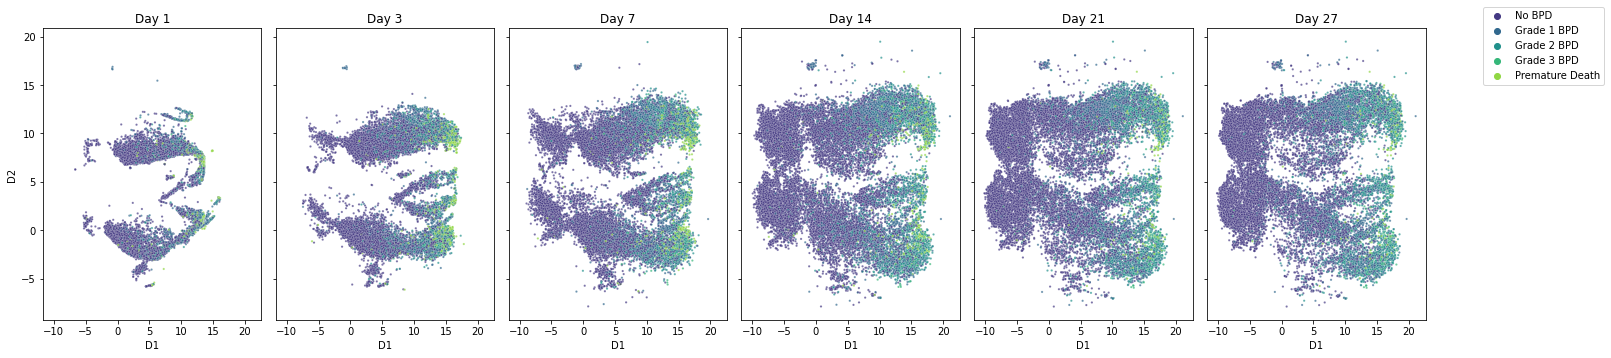

In [77]:
# Define the label mapping
label_mapping = {
    0: "No BPD", 
    1: "Grade 1 BPD", 
    2: "Grade 1 BPD", 
    3: "Grade 2 BPD", 
    4: "Grade 2 BPD", 
    5: "Grade 2 BPD", 
    6: "Grade 3 BPD", 
    7: "Grade 3 BPD", 
    8: "Premature Death"
}

hue_order = ['No BPD', 'Grade 1 BPD', 'Grade 2 BPD', 'Grade 3 BPD', 'Premature Death']

# Apply the label mapping to the filtered data
for day, data in filtered_data.items():
    data['Label'] = data['Label'].map(label_mapping)

# Plot the UMAP embeddings for each timepoint
fig, axes = plt.subplots(1, len(timepoints), figsize=(20, 5), sharex=True, sharey=True)

for ax, (day, data) in zip(axes, filtered_data.items()):
    sns.scatterplot(data=data, x='D1', y='D2', hue='Label', palette='viridis', ax=ax, s=5, alpha=0.7, 
                    hue_order=hue_order)
    ax.set_title(f"Day {day}")
    ax.legend().set_visible(False)

# Set a common legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))

plt.tight_layout()
plt.show()
